In [1]:
%tensorflow_version 2.x
import tensorflow as tf; 
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0


In [0]:
if int(tf.__version__[0]) < 2:
  print("Tensorflow version 2.2 is installed to replace version " + tf.__version__)
  !pip install tensorflow==2.2.0-rc3
  print("Restart Runtime, e.g. by clicking on Restart runtime in Runtime menu.")

In [0]:
import numpy as np

import math
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Reshape,BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras import callbacks
from matplotlib import pyplot as plt

(train_data, train_labels), (test_data,test_labels) = mnist.load_data()

In [0]:
# test_data = np.expand_dims(test_data, 3)
# train_data = np.expand_dims(train_data, 3)

test_data = test_data.reshape(-1,28,28,1)
train_data = train_data.reshape(-1,28,28,1)

test_data = test_data / 255 # Normalize
train_data = train_data / 255 # Normalize

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

In [5]:
model = Sequential([
                    Conv2D(32, (3, 3), padding="same", activation="relu"),
                    BatchNormalization(center=True, scale=False),
                    MaxPool2D(pool_size=(2, 2)),

                    Conv2D(64, (3, 3), padding="same", activation="relu"),
                    BatchNormalization(center=True, scale=False),
                    MaxPool2D(pool_size=(2, 2)),

                    Conv2D(128, (3, 3), padding="same", activation="relu"),
                    BatchNormalization(center=True, scale=False),
                    MaxPool2D(pool_size=(2, 2)),

                    Flatten(),

                    Dropout(0.3),
                    Dense(256, activation='relu'),
                    BatchNormalization(center=True, scale=False),

                    Dropout(0.5),
                    Dense(10, activation='softmax')
        ])
model.build(train_data.shape) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
batch_normalization (BatchNo multiple                  96        
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  192       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  7

In [0]:
model.compile(optimizer=optimizers.Adam(lr=0.01), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lrate = callbacks.LearningRateScheduler(lr_decay)

history=model.fit(train_data,train_labels, validation_data=(test_data,test_labels),batch_size=64,epochs=10,callbacks=[lrate])
# print(history.history.keys())

Epoch 1/10
938/938 [==============================] - 11s 12ms/step - loss: 0.1519 - accuracy: 0.9552 - val_loss: 0.1865 - val_accuracy: 0.9528 - lr: 0.0100
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0752 - accuracy: 0.9794 - val_loss: 0.0456 - val_accuracy: 0.9864 - lr: 0.0067
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0474 - accuracy: 0.9864 - val_loss: 0.0265 - val_accuracy: 0.9917 - lr: 0.0044
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0382 - accuracy: 0.9888 - val_loss: 0.0210 - val_accuracy: 0.9928 - lr: 0.0030
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0214 - val_accuracy: 0.9929 - lr: 0.0020
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0200 - val_accuracy: 0.9944 - lr: 0.0013
Epoch 7/10
938/938 [==============================] - 10s 

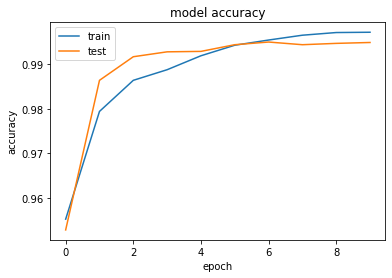

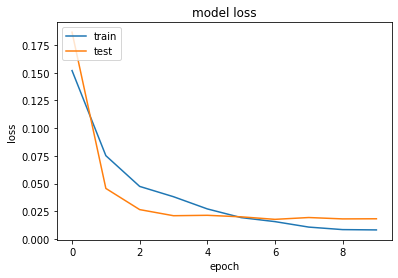

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.evaluate(test_data, test_labels, batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 0.0183 - accuracy: 0.9949


[0.018263546749949455, 0.9948999881744385]

In [0]:
model.save('MNIST_0.5%_YuShan_Lin_MNIST_model.h5')